In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
%matplotlib inline

In [3]:
data = pd.read_csv('drive/My Drive/Colab Notebooks/weights_heights.csv', index_col='Index')
data[:10]

FileNotFoundError: ignored

In [0]:
from google.colab import drive
drive.mount('/content/drive')

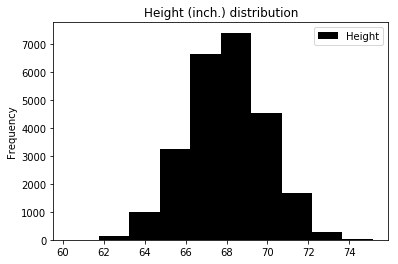

In [0]:
data.plot(y='Height', kind='hist', 
           color='black',  title='Height (inch.) distribution')

In [0]:
data.head(5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


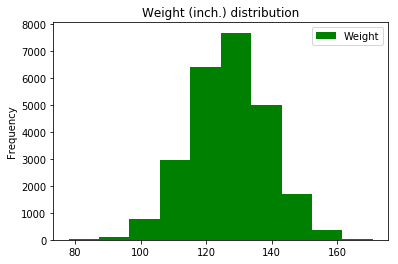

In [0]:
data.plot(y='Weight', kind='hist', 
           color='green',  title='Weight (inch.) distribution')

In [0]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [0]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

In [0]:
sns.pairplot(data)

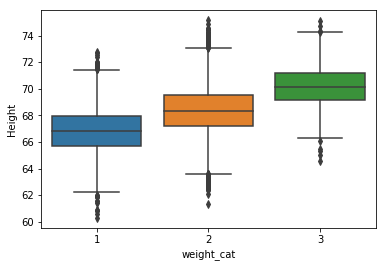

In [0]:
def weight_category(weight):
    if weight < 120:
        return 1
    elif weight > 150:
        return 3
    else:
        return 2

data['weight_cat'] = data['Weight'].apply(weight_category)
sns.boxplot(x="weight_cat", y="Height", data=data)

In [0]:
data.plot(x='Weight', y='Height', kind='scatter', title="Weight&Height", "D")

Task 2: Минимизация квадратичной ошибки

In [0]:
def find_error(w0, w1):
    return sum((data['Height'] - (w0 + w1*data['Weight']))**2)

def find_y(w0, w1, x):
    return w0 + w1*x


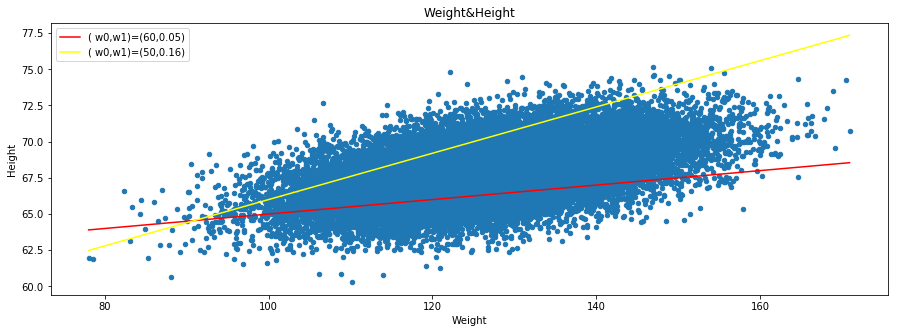

In [0]:
x = np.array([data['Weight'].min(), data['Weight'].max()])
w0, w1 = 60, 0.05
plt.rcParams['figure.figsize'] = (15, 5) 
data.plot(x='Weight', y='Height', kind='scatter', title="Weight&Height")

plt.plot(x, find_y(w0, w1, x), label='( w0,w1)=(60,0.05)', color='red')
w0, w1 = 50, 0.16
plt.plot(x, find_y(w0, w1, x), label='( w0,w1)=(50,0.16)', color='yellow')
plt.legend()

No handles with labels found to put in legend.


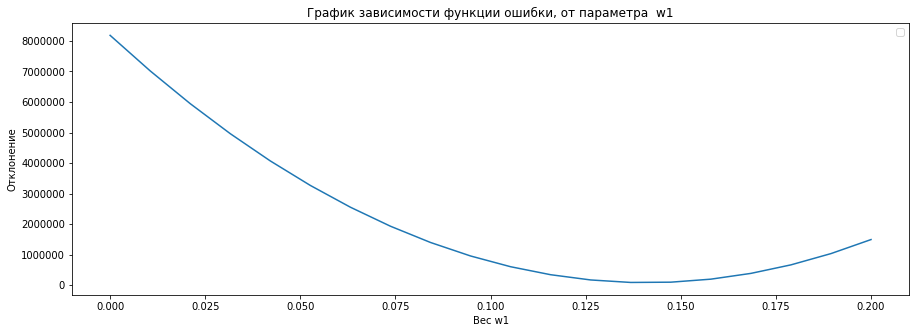

In [0]:
w0 = 50
w1 = np.linspace(0, 0.2, num=20)
err = []
for i in np.linspace(0, 0.2, num=20):
  err.append(find_error(w0, i))
plt.plot(w1, err)

plt.xlabel('Вес w1')
plt.ylabel('Отклонение')
plt.title('График зависимости функции ошибки, от параметра  w1')
plt.legend()


In [0]:
w0=50
mi = sc.optimize.minimize_scalar(lambda w1: find_error(w0,w1),bounds=(-5,5))
mi

     fun: 79512.21728699486
    nfev: 9
     nit: 5
 success: True
       x: 0.14109203728834385

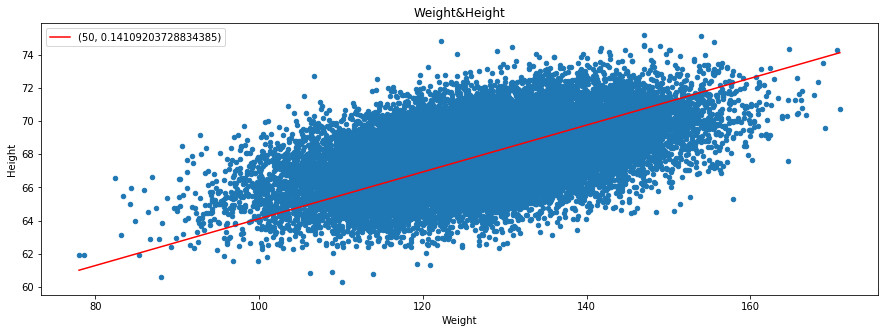

In [0]:
x = np.array([data['Weight'].min(), data['Weight'].max()])
w0 = 50
plt.rcParams['figure.figsize'] = (15, 5) 
data.plot(x='Weight', y='Height', kind='scatter', title="Weight&Height")

plt.plot(x, find_y(w0, mi.x, x), label=(w0, mi.x), color='red')
plt.legend()

In [0]:
from mpl_toolkits.mplot3d import Axes3D

[[-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 ...
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]]
[[-5.   -5.   -5.   ... -5.   -5.   -5.  ]
 [-4.75 -4.75 -4.75 ... -4.75 -4.75 -4.75]
 [-4.5  -4.5  -4.5  ... -4.5  -4.5  -4.5 ]
 ...
 [ 4.25  4.25  4.25 ...  4.25  4.25  4.25]
 [ 4.5   4.5   4.5  ...  4.5   4.5   4.5 ]
 [ 4.75  4.75  4.75 ...  4.75  4.75  4.75]]
[[ 0.70886129  0.57562789  0.42921793 ...  0.27541086  0.42921793
   0.57562789]
 [ 0.57562789  0.4208019   0.2570234  ...  0.09046523  0.2570234
   0.4208019 ]
 [ 0.42921793  0.2570234   0.08068791 ... -0.09334004  0.08068791
   0.2570234 ]
 ...
 [ 0.27541086  0.09046523 -0.09334004 ... -0.26940744 -0.09334004
   0.09046523]
 [ 0.42921793  0.2570234   0.08068791 ... -0.09334004  0.08068791
   0.2570234 ]
 [ 0.57562789  0.4208019   0.2570234  ...  0.09046523  0.257023

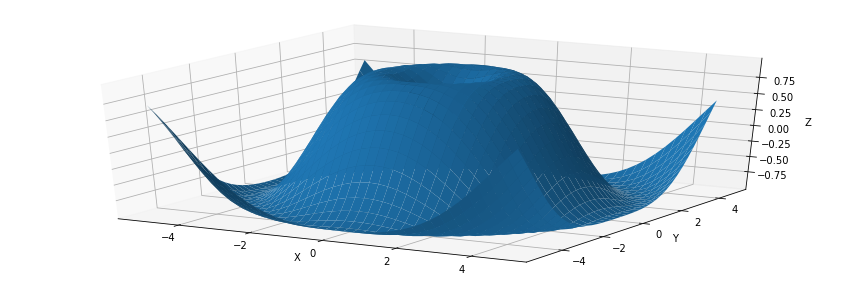

In [0]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))
print(X)
print(Y)
print(Z)
# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
[-0.5    -0.4625 -0.425  -0.3875 -0.35   -0.3125 -0.275  -0.2375 -0.2
 -0.1625 -0.125  -0.0875 -0.05   -0.0125  0.025   0.0625  0.1     0.1375
  0.175   0.2125  0.25    0.2875  0.325   0.3625  0.4     0.4375  0.475
  0.5125  0.55    0.5875  0.625   0.6625  0.7     0.7375  0.775   0.8125
  0.85    0.8875  0.925   0.9625]
[[3.12208262e+08 3.06656620e+08 3.01154979e+08 ... 1.40097537e+08
  1.36395896e+08 1.32744254e+08]
 [2.86057043e+08 2.80743676e+08 2.75480309e+08 ... 1.22762454e+08
  1.19299086e+08 1.15885719e+08]
 [2.61050875e+08 2.55975782e+08 2.50950688e+08 ... 1.06572420e+08
  1.03347327e+08 1.00172233e+08]
 ...
 [1.07216251e+08 1.10480745e+08 1.13795238e+08 ... 2.61302515e+08
  2.66417009e+08 2.71581503e+08]
 [1.23431869e+08 1.26934637e+08 1.30487404e+08 ... 2.86334269e+08
  2.91687036e+08 2.97089804e+08]
 [1.40792537e+08 1.44533579e+08 1.48324620e+08 ... 3.12

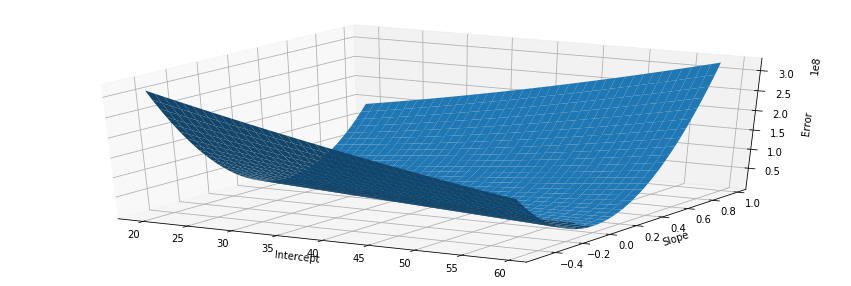

In [0]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

w0 = np.arange(20, 60, 1)
w1 = np.arange(-0.5, 1, 0.0375)
Z = np.zeros((40, 40))
w01, w11 = np.meshgrid(w0, w1)
for i in range(40):
  for j in range(40):
    Z[i][j] = find_error(w0[j], w1[i])
print(w0)
print(w1)
print(Z)
# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(w01, w11, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

In [0]:

 
def fun2(x):
   return find_error(*x)
 
x0 = (0,0)
res = sc.optimize.minimize(fun2, x0, method='L-BFGS-B', bounds = ((-100, 100), (-5, 5)))
res.x

array([57.57175421,  0.08200666])

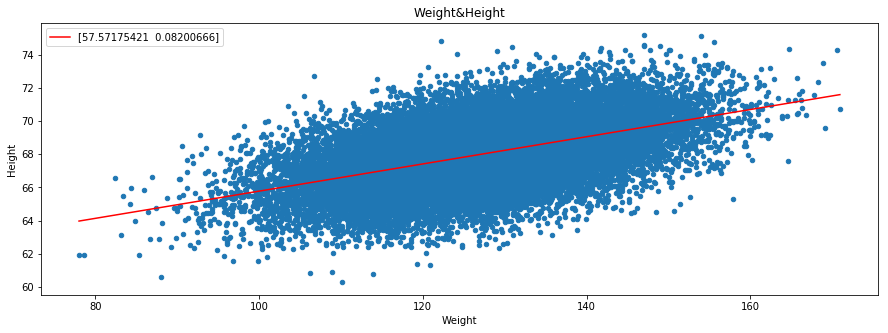

In [0]:
x = np.array([data['Weight'].min(), data['Weight'].max()])
plt.rcParams['figure.figsize'] = (15, 5) 
data.plot(x='Weight', y='Height', kind='scatter', title="Weight&Height")

plt.plot(x, find_y(res.x[0], res.x[1], x), label=(res.x), color='red')
plt.legend()

In [0]:
(57.57175421 + 0.08200666*(47.5/0.45))*2.45

162.25863127561115